# Hot spots for solar energy harvesting in the State of Virginia

#### Team Members:
* Hong Jik Lee (hl6ga@virginia.edu)
* Zoya Yeprem (zy8ez@virginia.edu)
* Aishwarya Sariya (ams4bv@virginia.edu)

### Reading the data

In [2]:
import os
import numpy as np
import pandas as pd
import glob
import csv


maindata = pd.read_csv('MainData.csv')

print(maindata.head())
print("---------------------------------------------------------------------------------------------------")
print(maindata.info())
print("---------------------------------------------------------------------------------------------------")

   Unnamed: 0  Year  Month  Day  Hour  Minute  DHI  DNI  GHI  Dew Point  \
0           0  2000      1    1     0       0    0    0    0        0.7   
1           1  2000      1    1     1       0    0    0    0        0.3   
2           2  2000      1    1     2       0    0    0    0        0.3   
3           3  2000      1    1     3       0    0    0    0        0.1   
4           4  2000      1    1     4       0    0    0    0        0.2   

   Temperature  Pressure  Relative Humidity  Wind Speed  Latitude  Longitude  
0            7      1022                100         2.6   36.8125   -76.0625  
1            3      1023                100         1.5   36.8125   -76.0625  
2            3      1023                100         0.0   36.8125   -76.0625  
3            1      1023                100         2.1   36.8125   -76.0625  
4            2      1023                100         0.0   36.8125   -76.0625  
---------------------------------------------------------------------------

### Dropping unnecessary rows

In [3]:
data_tr = maindata[maindata['GHI'] != 0]
print(data_tr)

         Unnamed: 0  Year  Month  Day  Hour  Minute  DHI  DNI  GHI  Dew Point  \
7                 7  2000      1    1     7       0    3  153    8        0.8   
8                 8  2000      1    1     8       0   66  491  163        0.9   
9                 9  2000      1    1     9       0   87  625  297        0.9   
10               10  2000      1    1    10       0  105  683  404        0.7   
11               11  2000      1    1    11       0  119  706  468        0.4   
12               12  2000      1    1    12       0  126  665  458        0.3   
13               13  2000      1    1    13       0  118  635  408        0.4   
14               14  2000      1    1    14       0   89  620  316        0.9   
15               15  2000      1    1    15       0   58  538  185        0.9   
16               16  2000      1    1    16       0   21  244   39        0.9   
31               31  2000      1    2     7       0    4   46    5        1.1   
32               32  2000   

### Dropping unnecessary columns

In [4]:
# Dropping columns that are not required

data_altered = data_tr.drop(["Unnamed: 0","Year","Month","Day","Hour","Minute","Latitude","Longitude"], axis=1)
print(data_altered)

         DHI  DNI  GHI  Dew Point  Temperature  Pressure  Relative Humidity  \
7          3  153    8        0.8            8      1025                100   
8         66  491  163        0.9           11      1025                 87   
9         87  625  297        0.9           13      1025                 77   
10       105  683  404        0.7           16      1025                 55   
11       119  706  468        0.4           18      1024                 39   
12       126  665  458        0.3           18      1023                 37   
13       118  635  408        0.4           19      1023                 37   
14        89  620  316        0.9           18      1023                 56   
15        58  538  185        0.9           18      1023                 56   
16        21  244   39        0.9           16      1024                 63   
31         4   46    5        1.1           11      1024                100   
32        82  150  111        1.1           12      

### Output the data

In [10]:
# Output the data

data_altered.to_csv('Altered Data.csv')

### Plotting the histogram

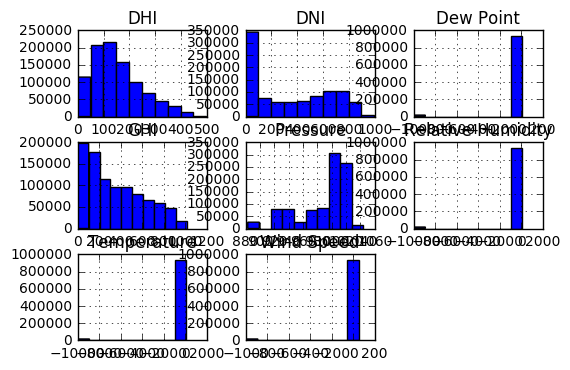

In [5]:
import matplotlib
import matplotlib.pyplot as plt

# Plotting the Histogram
data_altered.hist()
plt.show()

### Plotting the Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D500ACD8D0>,
      dtype=object)

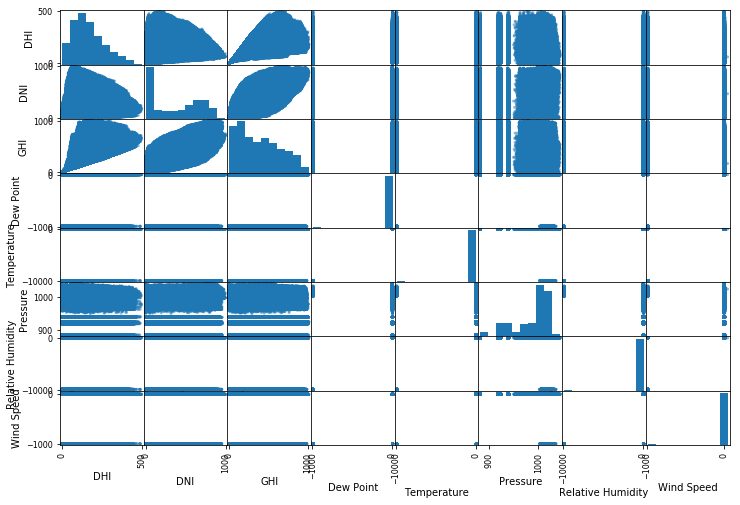

In [15]:
from pandas.plotting import scatter_matrix

# Plotting the Scatter Matrix
# attributes = ['DHI','DNI','GHI','Dew Point','Temperature','Pressure','Relative Humidity','Wind Speed']
scatter_matrix(data_altered, figsize=(12, 8))

### Plotting the Correlation Matrix

In [5]:
corr_matrix_tr = data_altered.corr()
corr_matrix_tr["GHI"].sort_values(ascending=False)
print(corr_matrix_tr)

                        DHI       DNI       GHI  Dew Point  Temperature  \
DHI                1.000000  0.066027  0.603260   0.001604     0.002144   
DNI                0.066027  1.000000  0.769807  -0.007094    -0.004895   
GHI                0.603260  0.769807  1.000000  -0.004579    -0.002681   
Dew Point          0.001604 -0.007094 -0.004579   1.000000     0.999992   
Temperature        0.002144 -0.004895 -0.002681   0.999992     1.000000   
Pressure          -0.036640  0.067287  0.027211  -0.078514    -0.078307   
Relative Humidity -0.002592 -0.014388 -0.012478   0.999904     0.999847   
Wind Speed         0.000535 -0.003158 -0.003091   0.997767     0.997785   

                   Pressure  Relative Humidity  Wind Speed  
DHI               -0.036640          -0.002592    0.000535  
DNI                0.067287          -0.014388   -0.003158  
GHI                0.027211          -0.012478   -0.003091  
Dew Point         -0.078514           0.999904    0.997767  
Temperature       -

### Scaling

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Scaling the data
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

### Splitting the training and testing sets

In [12]:
from sklearn.model_selection import train_test_split

# Train-Test split
train_set, test_set = train_test_split(data_altered, test_size=0.2, random_state=42)

X_train1 = train_set.drop('GHI', axis=1)
y_train = train_set["GHI"].copy()
X_test1 = test_set.drop('GHI', axis=1)
y_test = test_set["GHI"].copy()

temp1 = num_pipeline.fit_transform(X_train1)
X_train = pd.DataFrame(temp1, columns=X_train1.columns)

temp2 = num_pipeline.fit_transform(X_test1)
X_test = pd.DataFrame(temp2, columns=X_test1.columns)

c:\users\zy8ez\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\zy8ez\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\zy8ez\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\zy8ez\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Implementing Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression using in-built functions
logreg = LogisticRegression()

In [11]:
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
logreg.predict(X_test)

array([463, 868, 457, ..., 956, 120,  26], dtype=int64)

In [14]:
y_pred = logreg.predict(X_test)
len(y_pred)

162060

### Implementing Stochastic Gradient Descent Regressor

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor

# Using Stochastic Gradient Descent Regression built-in function
mySGDModel = SGDRegressor(max_iter=1000, penalty=None, eta0=0.001, random_state=0)
mySGDModel.fit(X_train,y_train)
y_pred_SGD = mySGDModel.predict(X_test)

mse = mean_squared_error(y_test, y_pred_SGD)
mySGDModel_rmse = np.sqrt(mse)
print(mySGDModel_rmse)

83.31586805246427


### Implementing Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
lin_reg.predict(X_test)

array([715.58821223,  60.35884171, 209.71203059, ..., 218.5025683 ,
        -9.03016357, 661.59818612])

In [11]:
y_pred_lin_reg = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lin_reg)
lin_reg_rmse = np.sqrt(mse)
print(lin_reg_rmse)

82.48030179792976


### Implementing Decision Tree Regressor

In [6]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [8]:
from sklearn.metrics import mean_squared_error

y_pred_decision_tree = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, y_pred_decision_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

22.82524342939888

In [ ]:
"""
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotpluss

dot_data = StringIO()
export_graphviz(tree_reg, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
"""

### Implementing Random Forest Regressor

In [6]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [7]:
import numpy as np
from sklearn.metrics import mean_squared_error

y_prediction = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, y_prediction)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

16.944251524849857

In [8]:
from sklearn.kernel_ridge import KernelRidge

kernel_ridge = KernelRidge(alpha=1.0)

In [1]:
kernel_ridge.fit(X_train, y_train)

### Implementing SVR with Linear Kernel

In [13]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, y_train)
y_predictions = svm_reg.predict(X_train)

In [14]:
from sklearn.metrics import mean_squared_error
import numpy as np

svm_mse = mean_squared_error(y_train, y_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

89.81977755689054